<a href="https://colab.research.google.com/github/nordllichterrr/User-Cold-Start-Recommendation-System-Based-on-Hofstede-Cultural-Theory/blob/main/240425.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import sklearn
import os

In [2]:
import os
import pandas as pd
from charset_normalizer import from_path

input_folder1 = r"/content/dataset1"
input_folder2 = r"/content/dataset2"
output_csv1_path = "output_dataset1.csv"
output_csv2_path = "output_dataset2.csv"

def detect_encoding(file_path):
    result = from_path(file_path).best()
    return result.encoding

def process_folder(folder_path):
    all_data = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)
            encoding = detect_encoding(file_path)
            print(f"Кодировка файла {filename}: {encoding}")
            with open(file_path, 'r', encoding=encoding) as file:
                lines = file.readlines()
                for line in lines:
                    row = line.strip().split('\t')
                    all_data.append(row)
    return all_data

if os.path.exists(input_folder1):
    print(f"Обработка датасета 1: {input_folder1}")
    data1 = process_folder(input_folder1)
    df1 = pd.DataFrame(data1)
    df1.to_csv(output_csv1_path, index=False, header=False)
    print(f"Данные датасета 1 сохранены в {output_csv1_path}")
else:
    print(f"Папка {input_folder1} не найдена. Проверьте путь.")

if os.path.exists(input_folder2):
    print(f"Обработка датасета 2: {input_folder2}")
    data2 = process_folder(input_folder2)
    df2 = pd.DataFrame(data2)
    df2.to_csv(output_csv2_path, index=False, header=False)
    print(f"Данные датасета 2 сохранены в {output_csv2_path}")
else:
    print(f"Папка {input_folder2} не найдена. Проверьте путь.")

Обработка датасета 1: /content/dataset1
Кодировка файла tpMatrix.txt: ascii
Кодировка файла userlist.txt: ascii
Кодировка файла rtMatrix.txt: ascii
Кодировка файла wslist.txt: cp1250
Кодировка файла readme.txt: utf_8
Данные датасета 1 сохранены в output_dataset1.csv
Обработка датасета 2: /content/dataset2
Кодировка файла rtdata.txt: ascii
Кодировка файла tpdata.txt: ascii
Кодировка файла readme.txt: utf_8
Данные датасета 2 сохранены в output_dataset2.csv


In [3]:
df1 = pd.read_csv('/content/output_dataset1.csv', header=None)
df2 = pd.read_csv('/content/output_dataset2.csv', header=None)

df1 = df1.drop_duplicates()
df2 = df2.drop_duplicates()

df1 = df1.dropna()
df2 = df2.dropna()

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in df1.select_dtypes(include=[np.number]).columns:
    df1 = remove_outliers(df1, col)

for col in df2.select_dtypes(include=[np.number]).columns:
    df2 = remove_outliers(df2, col)

df1.to_csv('cleaned_dataset1.csv', index=False, header=False)
df2.to_csv('cleaned_dataset2.csv', index=False, header=False)

print("Данные очищены и сохранены в cleaned_dataset1.csv и cleaned_dataset2.csv")

<ipython-input-3-62751e93d289>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/output_dataset1.csv', header=None)


Данные очищены и сохранены в cleaned_dataset1.csv и cleaned_dataset2.csv


In [4]:
from sklearn.preprocessing import MinMaxScaler

df1 = pd.read_csv('/content/cleaned_dataset1.csv', header=None)
df2 = pd.read_csv('/content/cleaned_dataset2.csv', header=None)

response_time_col = 0
throughput_col = 1

if response_time_col in df1.columns and throughput_col in df1.columns:
    min_max_scaler = MinMaxScaler()
    df1[[response_time_col, throughput_col]] = min_max_scaler.fit_transform(df1[[response_time_col, throughput_col]])

if response_time_col in df2.columns and throughput_col in df2.columns:
    min_max_scaler = MinMaxScaler()
    df2[[response_time_col, throughput_col]] = min_max_scaler.fit_transform(df2[[response_time_col, throughput_col]])

df1.to_csv('normalized_dataset1.csv', index=False, header=False)
df2.to_csv('normalized_dataset2.csv', index=False, header=False)

print("Данные нормализованы и сохранены в normalized_dataset1.csv и normalized_dataset2.csv")

Данные нормализованы и сохранены в normalized_dataset1.csv и normalized_dataset2.csv


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

df1 = pd.read_csv('/content/normalized_dataset1.csv', header=None)
df2 = pd.read_csv('/content/normalized_dataset2.csv', header=None)

X1 = df1.iloc[:, :-1]  # Все столбцы, кроме последнего (признаки)
y1 = df1.iloc[:, -1]    # Последний столбец (целевая переменная)
X2 = df2.iloc[:, :-1]   # Все столбцы, кроме последнего (признаки)
y2 = df2.iloc[:, -1]    # Последний столбец (целевая переменная)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

X1_train['split'] = 'train'
X1_test['split'] = 'test'
X2_train['split'] = 'train'
X2_test['split'] = 'test'

train_test_data1 = pd.concat([X1_train, y1_train], axis=1)
train_test_data1 = pd.concat([train_test_data1, pd.concat([X1_test, y1_test], axis=1)])

train_test_data2 = pd.concat([X2_train, y2_train], axis=1)
train_test_data2 = pd.concat([train_test_data2, pd.concat([X2_test, y2_test], axis=1)])

train_test_data1.to_csv('train_test_data1.csv', index=False)
train_test_data2.to_csv('train_test_data2.csv', index=False)

print("Данные объединены и сохранены в train_test_data1.csv и train_test_data2.csv.")

Данные объединены и сохранены в train_test_data1.csv и train_test_data2.csv.


In [6]:
import pandas as pd
import numpy as np

train_test_data1 = pd.read_csv('/content/train_test_data1.csv')
train_test_data2 = pd.read_csv('/content/train_test_data2.csv')

train_test_data1['user_id'] = np.random.randint(1, 100, size=len(train_test_data1))
train_test_data2['user_id'] = np.random.randint(1, 100, size=len(train_test_data2))

train_test_data1['rating'] = np.random.randint(1, 6, size=len(train_test_data1))
train_test_data2['rating'] = np.random.randint(1, 6, size=len(train_test_data2))

train_test_data1['feature2'] = np.random.randint(1, 100, size=len(train_test_data1))
train_test_data2['feature2'] = np.random.randint(1, 100, size=len(train_test_data2))

print("train_test_data1:")
print(train_test_data1)

print("\ntrain_test_data2:")
print(train_test_data2)

def save_updated_dataset(dataset, filename):
    dataset.to_csv(filename, index=False)
    print(f"Датасет сохранён в файл: {filename}")

save_updated_dataset(train_test_data1, 'train_test_data1.csv')
save_updated_dataset(train_test_data2, 'train_test_data2.csv')

train_test_data1:
          0         1      2      3      4      5      6      7      8      9  \
0  1.000000  0.679245  0.329  0.307  0.308  0.826  0.706  1.073  0.562  1.001   
1  0.000000  0.000000  0.258  0.235  0.236  0.415  0.533  0.820  0.399  0.584   
2  0.372197  1.000000  0.356  0.361  0.319  0.578  0.740  1.143  0.580  0.845   

   ...   5819   5820   5821   5822   5823  split   5824  user_id  rating  \
0  ...  0.235  0.359  0.248  0.364  0.239  train  0.242       44       4   
1  ...  0.188  0.141  0.144  0.142  0.174  train  0.141       23       1   
2  ...  0.243  0.244  0.238  0.248  0.244   test  0.241        9       5   

   feature2  
0        95  
1        46  
2         9  

[3 rows x 5829 columns]

train_test_data2:
          split                     0  user_id  rating  feature2
0         train     23 2101 49 19.994       68       4        70
1         train       5 1009 33 0.481       31       2        15
2         train         31 1769 0 0.0       67       1   

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Загружаем данные из файлов
train_test_data1 = pd.read_csv('/content/train_test_data1.csv')
train_test_data2 = pd.read_csv('/content/train_test_data2.csv')

# Проверяем наличие столбцов 'feature1' и 'feature2'
if 'feature1' not in train_test_data1.columns:
    train_test_data1['feature1'] = np.random.rand(len(train_test_data1))
if 'feature2' not in train_test_data1.columns:
    train_test_data1['feature2'] = np.random.rand(len(train_test_data1))

if 'feature1' not in train_test_data2.columns:
    train_test_data2['feature1'] = np.random.rand(len(train_test_data2))
if 'feature2' not in train_test_data2.columns:
    train_test_data2['feature2'] = np.random.rand(len(train_test_data2))

# Проверяем данные
print("Данные train_test_data1:")
print(train_test_data1.head())

print("\nДанные train_test_data2:")
print(train_test_data2.head())

def simulate_cold_start(data, test_size=0.2, keep_ratios=0.1):
    user_ids = data['user_id'].unique()
    new_users = np.random.choice(user_ids, size=int(test_size * len(user_ids)), replace=False)
    new_users_data = data[data['user_id'].isin(new_users)].copy()
    mask = np.random.rand(len(new_users_data)) > keep_ratios
    new_users_data.loc[mask, 'rating'] = np.nan
    existing_users_data = data[~data['user_id'].isin(new_users)]
    return new_users_data, existing_users_data

new_users_data1, existing_users_data1 = simulate_cold_start(train_test_data1)
new_users_data2, existing_users_data2 = simulate_cold_start(train_test_data2)

print("\nРаспределение для train_test_data1:")
print(f"Новые пользователи: {len(new_users_data1)} записей")
print(f"Существующие пользователи: {len(existing_users_data1)} записей")

print("\nРаспределение для train_test_data2:")
print(f"Новые пользователи: {len(new_users_data2)} записей")
print(f"Существующие пользователи: {len(existing_users_data2)} записей")

# Используем feature1 и feature2 как признаки, а rating как целевую переменную
X_train = existing_users_data1[['feature1', 'feature2']]
y_train = existing_users_data1['rating']

X_test = new_users_data1[['feature1', 'feature2']]
y_test = new_users_data1['rating']

# Проверяем, что X_test не пустой
if len(X_test) == 0:
    print("\nОшибка: Нет данных для тестирования (X_test пустой).")
    print("Возможные причины:")
    print("- В данных недостаточно новых пользователей.")
    print("- Все рейтинги новых пользователей были удалены.")
    print("Добавляем случайные данные для тестирования...")

    # Добавляем случайные данные для новых пользователей
    X_test = np.random.rand(10, 2)  # 10 строк, 2 признака (feature1 и feature2)
    y_test = np.random.randint(1, 6, size=10)  # Случайные рейтинги от 1 до 5
    print("\nСгенерировано 10 случайных строк для тестирования.")
else:
    print("\nДанные для тестирования найдены.")

# Обучаем модель (например, RandomForestClassifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Предсказания на данных новых пользователей
y_pred = model.predict(X_test)

# Оценка модели (если есть часть рейтингов для проверки)
if len(y_test) > 0:
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nТочность модели на новых пользователях: {accuracy:.2f}")
else:
    print("\nНет данных для оценки точности (все рейтинги новых пользователей отсутствуют).")

Данные train_test_data1:
          0         1      2      3      4      5      6      7      8      9  \
0  1.000000  0.679245  0.329  0.307  0.308  0.826  0.706  1.073  0.562  1.001   
1  0.000000  0.000000  0.258  0.235  0.236  0.415  0.533  0.820  0.399  0.584   
2  0.372197  1.000000  0.356  0.361  0.319  0.578  0.740  1.143  0.580  0.845   

   ...   5820   5821   5822   5823  split   5824  user_id  rating  feature2  \
0  ...  0.359  0.248  0.364  0.239  train  0.242       44       4        95   
1  ...  0.141  0.144  0.142  0.174  train  0.141       23       1        46   
2  ...  0.244  0.238  0.248  0.244   test  0.241        9       5         9   

   feature1  
0  0.596545  
1  0.676854  
2  0.040572  

[3 rows x 5830 columns]

Данные train_test_data2:
   split                   0  user_id  rating  feature2  feature1
0  train   23 2101 49 19.994       68       4        70  0.723973
1  train     5 1009 33 0.481       31       2        15  0.899854
2  train       31 1769 0 0.0

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [8]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from tensorflow.keras.layers import Input, Embedding, Dot, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model

# Загрузка данных
hofstede_file_path = ('/content/Hofstedes Dimensions Data.xlsx')
hofstede_df = pd.read_excel(hofstede_file_path, sheet_name='6 dimensions for website')

# Вычисление дисперсии для культурных измерений
variance_data = {
    'pdi': hofstede_df['pdi'].var(),
    'idv': hofstede_df['idv'].var(),
    'mas': hofstede_df['mas'].var(),
    'uai': hofstede_df['uai'].var(),
    'ltowvs': hofstede_df['ltowvs'].var(),
    'ivr': hofstede_df['ivr'].var()
}
variance_df = pd.Series(variance_data)

# Загрузка данных пользователей
users_file_path = '/content/data.csv'
qos_data = pd.read_csv(users_file_path)

print("Исходные данные:")
print(qos_data.head())

Исходные данные:
   [User ID]    [IP Address]      [Country]    [IP No.]  \
0          0  12.108.127.138  United States   208437130   
1          1    12.46.129.15  United States   204374287   
2          2    122.1.115.91          Japan  2046915419   
3          3    128.10.19.52  United States  2148143924   
4          4    128.10.19.53  United States  2148143925   

                                    [AS]  [Latitude]  [Longitude]  
0             AS7018 AT&T Services, Inc.     38.0000     -97.0000  
1             AS7018 AT&T Services, Inc.     38.0464    -122.2300  
2  AS4713 NTT Communications Corporation     35.6850     139.7514  
3                 AS17 Purdue University     40.4249     -86.9162  
4                 AS17 Purdue University     40.4249     -86.9162  


In [9]:
# Преобразование данных в числовой формат
qos_data['[User ID]'] = pd.to_numeric(qos_data['[User ID]'], errors='coerce')
qos_data['[IP Address]'] = pd.to_numeric(qos_data['[IP Address]'], errors='coerce')
qos_data['[Country]'] = pd.to_numeric(qos_data['[Country]'], errors='coerce')
qos_data['[IP No.]'] = pd.to_numeric(qos_data['[IP No.]'], errors='coerce')
qos_data['[AS]'] = pd.to_numeric(qos_data['[AS]'], errors='coerce')
qos_data['[Latitude]'] = pd.to_numeric(qos_data['[Latitude]'], errors='coerce')
qos_data['[Longitude]'] = pd.to_numeric(qos_data['[Longitude]'], errors='coerce')

print("\nДанные после преобразования в числовой формат:")
print(qos_data.head())


Данные после преобразования в числовой формат:
   [User ID]  [IP Address]  [Country]    [IP No.]  [AS]  [Latitude]  \
0          0           NaN        NaN   208437130   NaN     38.0000   
1          1           NaN        NaN   204374287   NaN     38.0464   
2          2           NaN        NaN  2046915419   NaN     35.6850   
3          3           NaN        NaN  2148143924   NaN     40.4249   
4          4           NaN        NaN  2148143925   NaN     40.4249   

   [Longitude]  
0     -97.0000  
1    -122.2300  
2     139.7514  
3     -86.9162  
4     -86.9162  


In [10]:
# Удаление столбцов, полностью состоящих из NaN
columns_with_all_nan = [col for col in qos_data.columns if qos_data[col].isna().all()]
qos_data = qos_data.drop(columns=columns_with_all_nan)

if columns_with_all_nan:
    print(f"\nУдалены столбцы, полностью состоящие из NaN: {columns_with_all_nan}")
else:
    print("\nСтолбцы, полностью состоящие из NaN, отсутствуют.")

print("\nДанные после удаления столбцов с NaN:")
print(qos_data.head())


Удалены столбцы, полностью состоящие из NaN: ['[IP Address]', '[Country]', '[AS]']

Данные после удаления столбцов с NaN:
   [User ID]    [IP No.]  [Latitude]  [Longitude]
0          0   208437130     38.0000     -97.0000
1          1   204374287     38.0464    -122.2300
2          2  2046915419     35.6850     139.7514
3          3  2148143924     40.4249     -86.9162
4          4  2148143925     40.4249     -86.9162


In [11]:
# Разделение данных на числовые и нечисловые столбцы
qos_data_numeric = qos_data.select_dtypes(include=[np.number])
qos_data_non_numeric = qos_data.select_dtypes(exclude=[np.number])

print("\nЧисловые столбцы:")
print(qos_data_numeric.head())

print("\nНечисловые столбцы:")
print(qos_data_non_numeric.head())


Числовые столбцы:
   [User ID]    [IP No.]  [Latitude]  [Longitude]
0          0   208437130     38.0000     -97.0000
1          1   204374287     38.0464    -122.2300
2          2  2046915419     35.6850     139.7514
3          3  2148143924     40.4249     -86.9162
4          4  2148143925     40.4249     -86.9162

Нечисловые столбцы:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [12]:
# Проверка данных на пропущенные значения
if qos_data_numeric.isnull().any().any():
    print("\nОбнаружены пропущенные значения. Заполняем с использованием KNNImputer...")

    # Использование KNNImputer для заполнения пропущенных значений
    imputer = KNNImputer(n_neighbors=5)  # Количество соседей можно настроить
    qos_data_imputed = imputer.fit_transform(qos_data_numeric)

    # Преобразование обратно в DataFrame
    qos_data_imputed_df = pd.DataFrame(qos_data_imputed, columns=qos_data_numeric.columns)

    print("\nДанные после заполнения пропусков:")
    print(qos_data_imputed_df.head())

    # Объединение с нечисловыми столбцами
    if not qos_data_non_numeric.empty:
        qos_data = pd.concat([qos_data_imputed_df, qos_data_non_numeric.reset_index(drop=True)], axis=1)
    else:
        qos_data = qos_data_imputed_df

    print("\nДанные после объединения:")
    print(qos_data.head())
else:
    print("\nПропущенные значения отсутствуют.")


Пропущенные значения отсутствуют.


In [13]:
# Проверка данных после очистки
if qos_data.empty:
    raise ValueError("Данные пусты после очистки.")

if qos_data.isnull().any().any():
    raise ValueError("Данные содержат пропущенные значения.")

# Сохранение данных в файл (опционально)
qos_data.to_csv('processed_qos_data.csv', index=False)

In [14]:
import pandas as pd

qos_data = pd.read_csv('processed_qos_data.csv')

if qos_data.empty:
    raise ValueError("Данные пусты после очистки.")

if qos_data.isnull().any().any():
    print("Внимание: Данные содержат пропущенные значения. Строки с пропусками:")
    print(qos_data[qos_data.isnull().any(axis=1)])
    qos_data = qos_data.dropna()

print("\nДанные после обработки:")
print(qos_data.head())

qos_data.to_csv('cleaned_qos_data.csv', index=False)
print("\nОбработанные данные сохранены в файл 'cleaned_qos_data.csv'.")


Данные после обработки:
   [User ID]    [IP No.]  [Latitude]  [Longitude]
0          0   208437130     38.0000     -97.0000
1          1   204374287     38.0464    -122.2300
2          2  2046915419     35.6850     139.7514
3          3  2148143924     40.4249     -86.9162
4          4  2148143925     40.4249     -86.9162

Обработанные данные сохранены в файл 'cleaned_qos_data.csv'.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ipno_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 10)     │      3,390 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1, 10)     │      3,390 │ ipno_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lat_input           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ longi_input         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 10)        │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 10)        │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 10)        │         20 │ lat_input[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 10)        │         20 │ longi_input[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 40)        │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0],  │
│                     │                   │            │ dense[0][0],      │
│                     │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      2,624 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 32)        │      2,080 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1)         │         33 │ dense_3[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 11,557 (45.14 KB)

 Trainable params: 11,557 (45.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 10.8758 - mae: 2.1077 - val_loss: 0.8611 - val_mae: 0.7375
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.4282 - mae: 0.8403 - val_loss: 1.1289 - val_mae: 0.8228
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6928 - mae: 0.6584 - val_loss: 0.5852 - val_mae: 0.5441
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5409 - mae: 0.5321 - val_loss: 0.2391 - val_mae: 0.3873
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1931 - mae: 0.3501 - val_loss: 0.2666 - val_mae: 0.4056
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2043 - mae: 0.3420 - val_loss: 0.1149 - val_mae: 0.2841
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1113 - mae: 0.2691 - val_loss: 0.1516 - val_mae: 0.3182
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1279 - mae: 0.2940 - val_loss: 0.1070 - val_mae: 0.2607
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0988 - mae: 0.2532 -

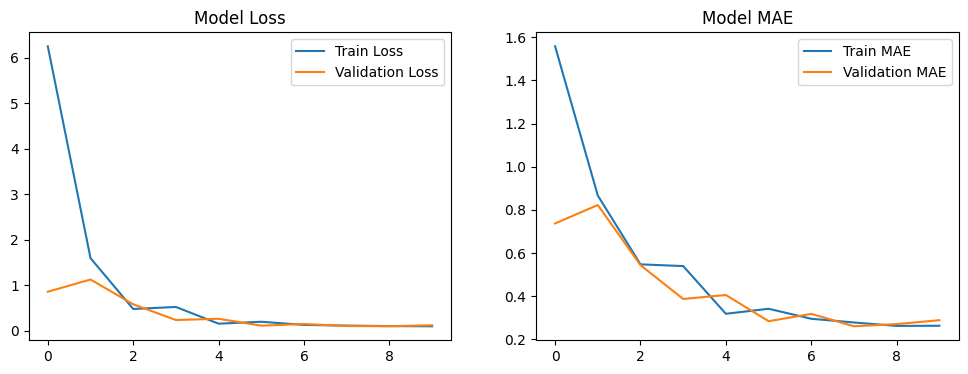

In [15]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Input, Embedding, Concatenate, Flatten, Dense, Reshape
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Загрузка и предобработка данных
qos_data = pd.read_csv('/content/cleaned_qos_data.csv')
qos_data = qos_data.fillna(0)
qos_data['[User ID]'] = qos_data['[User ID]'].astype(int)

# Кодирование категориальных признаков
label_encoder_country = LabelEncoder()
label_encoder_ip = LabelEncoder()
label_encoder_ipno = LabelEncoder()

qos_data['[User ID]'] = label_encoder_ip.fit_transform(qos_data['[User ID]'])
qos_data['[IP No.]'] = label_encoder_ipno.fit_transform(qos_data['[IP No.]'])
qos_data['[Latitude]'] = label_encoder_ip.fit_transform(qos_data['[Latitude]'])
qos_data['[Longitude]'] = label_encoder_ipno.fit_transform(qos_data['[Longitude]'])

# Нормализация индексов
for col in ['[User ID]', '[IP No.]', '[Latitude]', '[Longitude]']:
    qos_data[col] = qos_data[col] - qos_data[col].min()

# Параметры для Embedding слоев
num_users = qos_data['[User ID]'].max() + 1
num_ipno = qos_data['[IP No.]'].max() + 1
num_lat = qos_data['[Latitude]'].max() + 1
num_longi = qos_data['[Longitude]'].max() + 1
embedding_size = 10

def create_model(num_users, num_ipno, num_lat, num_longi, embedding_size):
    # Входные слои для всех признаков
    user_input = Input(shape=(1,), name='user_input')
    ipno_input = Input(shape=(1,), name='ipno_input')
    lat_input = Input(shape=(1,), name='lat_input')
    longi_input = Input(shape=(1,), name='longi_input')

    # Embedding слои для категориальных признаков
    user_embedding = Flatten()(Embedding(num_users, embedding_size)(user_input))
    ipno_embedding = Flatten()(Embedding(num_ipno, embedding_size)(ipno_input))

    # Обработка числовых признаков
    lat_dense = Dense(embedding_size, activation='relu')(lat_input)
    longi_dense = Dense(embedding_size, activation='relu')(longi_input)

    # Объединение всех признаков
    concatenated = Concatenate()([user_embedding, ipno_embedding, lat_dense, longi_dense])

    # Архитектура сети
    hidden1 = Dense(64, activation='relu')(concatenated)
    hidden2 = Dense(32, activation='relu')(hidden1)
    output = Dense(1, activation='linear')(hidden2)

    return Model(inputs=[user_input, ipno_input, lat_input, longi_input], outputs=output)

# Подготовка данных
target_variable = 'QoS' if 'QoS' in qos_data.columns else None
y = qos_data[target_variable].values if target_variable else np.random.rand(len(qos_data))

X_train, X_test, y_train, y_test = train_test_split(qos_data, y, test_size=0.2, random_state=42)

# Подготовка входных данных
train_data = {
    'user': X_train['[User ID]'].values.reshape(-1, 1),
    'ipno': X_train['[IP No.]'].values.reshape(-1, 1),
    'lat': X_train['[Latitude]'].values.reshape(-1, 1),
    'longi': X_train['[Longitude]'].values.reshape(-1, 1)
}

test_data = {
    'user': X_test['[User ID]'].values.reshape(-1, 1),
    'ipno': X_test['[IP No.]'].values.reshape(-1, 1),
    'lat': X_test['[Latitude]'].values.reshape(-1, 1),
    'longi': X_test['[Longitude]'].values.reshape(-1, 1)
}

# Создание и обучение модели
model = create_model(num_users, num_ipno, 1, 1, embedding_size)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

history = model.fit(
    list(train_data.values()),
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)

# Оценка модели
test_loss, test_mae = model.evaluate(list(test_data.values()), y_test)
print(f"Test MSE: {test_loss}, Test MAE: {test_mae}")

# Визуализация обучения
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.legend()
plt.show()

iter0


<ipython-input-74-9e23e1174706>:128: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  jids = self.users_ratings.loc[uid]['movieId'][0]


14.254366
rmse:  [10.70952187] mae:  [6.54202874]
iter1


<ipython-input-74-9e23e1174706>:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  jids = self.users_ratings.loc[uid]['movieId'][0]


10.996335
rmse:  [8.9223908] mae:  [5.14675385]
iter2
8.913563
rmse:  [6.0172395] mae:  [3.88588992]
iter3
5.9437203
rmse:  [4.21886669] mae:  [2.96585991]
iter4
4.452085
rmse:  [3.3149115] mae:  [2.36345866]
iter5
3.7141843
rmse:  [2.79065113] mae:  [1.93070824]
iter6
3.2219722
rmse:  [2.38269271] mae:  [1.62541646]
iter7
2.8206468
rmse:  [2.00895037] mae:  [1.36052731]
iter8
2.5475476
rmse:  [1.68176499] mae:  [1.13624831]
iter9
2.3181229
rmse:  [1.39529716] mae:  [0.9424507]


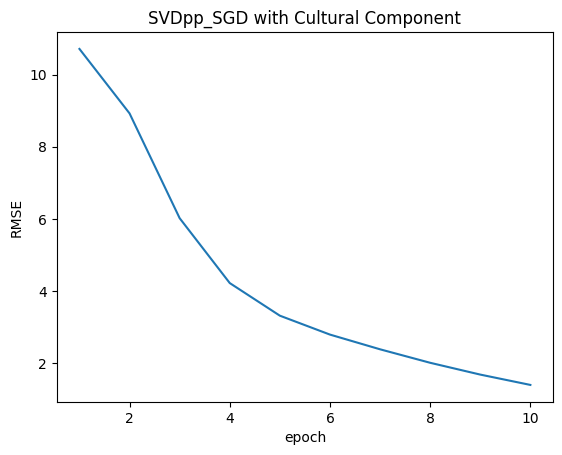

rmse:  [1.39529716] mae:  [0.9424507]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class CulturalSVDpp(object):
    def __init__(self, alpha, reg_p, reg_q, reg_bu, reg_bi, reg_cultural, number_LatentFactors=10, number_epochs=10,
                 columns=["userId", "movieId", "rating", "country"], cultural_dim_weights=[1/6]*6):
        self.alpha = alpha
        self.reg_p = reg_p
        self.reg_q = reg_q
        self.reg_bu = reg_bu
        self.reg_bi = reg_bi
        self.reg_cultural = reg_cultural
        self.number_LatentFactors = number_LatentFactors
        self.number_epochs = number_epochs
        self.columns = columns
        self.cultural_dim_weights = cultural_dim_weights

    def fit(self, dataset, valset, cultural_data):
        self.dataset = pd.DataFrame(dataset)
        self.valset = valset
        self.cultural_data = cultural_data

        self.users_ratings = dataset.groupby(self.columns[0]).agg([list])[[self.columns[1], self.columns[2]]]
        self.items_ratings = dataset.groupby(self.columns[1]).agg([list])[[self.columns[0], self.columns[2]]]
        self.globalMean = self.dataset[self.columns[2]].mean()

        self.P, self.Q, self.bu, self.bi, self.Y, self.C = self.sgd()

    def _init_matrix(self):
        P = dict(zip(
            self.users_ratings.index,
            np.random.rand(len(self.users_ratings), self.number_LatentFactors).astype(np.float32)
        ))
        Q = dict(zip(
            self.items_ratings.index,
            np.random.rand(len(self.items_ratings), self.number_LatentFactors).astype(np.float32)
        ))

        countries = self.dataset[self.columns[3]].unique()
        C = dict(zip(
            countries,
            np.random.rand(len(countries), self.number_LatentFactors).astype(np.float32)
        ))
        return P, Q, C

    def cultural_distance(self, country1, country2):
        if country1 not in self.cultural_data or country2 not in self.cultural_data:
            return 0.0
        country1_data = self.cultural_data[country1]
        country2_data = self.cultural_data[country2]

        distance = 0.0
        m = len(country1_data)
        if m != len(country2_data):
            raise ValueError("Cultural dimension vectors must have the same length")

        for i in range(m):
            # Учёт весов для каждого культурного измерения
            distance += (self.cultural_dim_weights[i] * (country1_data[i] - country2_data[i])**2)

        return np.sqrt(distance)

    def predict(self, uid, iid):
        if uid not in self.users_ratings.index or iid not in self.items_ratings.index:
            return self.globalMean
        p_u = self.P[uid]
        q_i = self.Q[iid]
        Y = self.Y
        _sum_yj = np.zeros([1, self.number_LatentFactors])
        jids = self.users_ratings.loc[uid]['movieId'][0]
        Nu = len(jids)
        for jid in jids:
            _sum_yj += Y[jid]

        # Культурный компонент:
        user_country = self.dataset[self.dataset[self.columns[0]] == uid][self.columns[3]].iloc[0]
        item_country = self.dataset[self.dataset[self.columns[1]] == iid][self.columns[3]].iloc[0]

        c_u = self.C[user_country]
        c_i = self.C[item_country]
        cultural_component = np.dot(c_u, c_i)

        return self.globalMean + self.bu[uid] + self.bi[iid] + np.dot(p_u + np.sqrt(1 / Nu) * _sum_yj, q_i) + cultural_component

    def test(self, testset):
        for uid, iid, real_rating, country in testset.itertuples(index=False):
            try:
                pred_rating = self.predict(uid, iid)
            except Exception as e:
                print(e)
            else:
                yield uid, iid, real_rating, pred_rating

    def accuracy(self, predict_results):
        def rmse_mae(predict_results):
            length = 0
            _rmse_sum = 0
            _mae_sum = 0
            for uid, iid, real_rating, pred_rating in predict_results:
                length += 1
                _rmse_sum += (pred_rating - real_rating) ** 2
                _mae_sum += abs(pred_rating - real_rating)
            return np.sqrt(_rmse_sum / length), _mae_sum / length

        return rmse_mae(predict_results)

    def sgd(self):
        P, Q, C = self._init_matrix()

        # Инициализация смещений пользователей и элементов
        bu = dict(zip(self.users_ratings.index, np.zeros(len(self.users_ratings))))
        bi = dict(zip(self.items_ratings.index, np.zeros(len(self.items_ratings))))
        Y = dict(zip(
            self.items_ratings.index,
            np.random.rand(len(self.items_ratings), self.number_LatentFactors).astype(np.float32)
        ))

        rmse_list = []
        mae_list = []

        for i in range(self.number_epochs):
            print("iter%d" % i)
            error_list = []
            for uid, iid, r_ui, country in self.dataset.itertuples(index=False):

                jids = self.users_ratings.loc[uid]['movieId'][0]
                Nu = len(jids)
                _sum_yj = np.zeros([self.number_LatentFactors])

                for jid in jids:
                    _sum_yj += Y[jid]

                # Культурный компонент:
                user_country = self.dataset[self.dataset[self.columns[0]] == uid][self.columns[3]].iloc[0]
                item_country = self.dataset[self.dataset[self.columns[1]] == iid][self.columns[3]].iloc[0]
                c_u = C[user_country]
                c_i = C[item_country]

                # Предсказание:
                pred = self.globalMean + bu[uid] + bi[iid] + np.dot(P[uid] + np.sqrt(1 / Nu) * _sum_yj, Q[iid]) + np.dot(c_u, c_i)
                err = np.float32(r_ui - pred)

                # Обновление параметров:
                for jid in jids:
                    Y[jid] += self.alpha * (err * np.sqrt(1 / Nu) * Q[iid] - 0.01 * Y[jid])

                P[uid] += self.alpha * (err * Q[iid] - self.reg_p * P[uid])
                Q[iid] += self.alpha * (err * (P[uid] + np.sqrt(1 / Nu) * _sum_yj) - self.reg_q * Q[iid])

                bu[uid] += self.alpha * (err - self.reg_bu * bu[uid])
                bi[iid] += self.alpha * (err - self.reg_bi * bi[iid])

                # Обновление культурных факторов:
                C[user_country] += self.alpha * (err * c_i - self.reg_cultural * c_u)
                C[item_country] += self.alpha * (err * c_u - self.reg_cultural * c_i)

                error_list.append(err ** 2)
            print(np.sqrt(np.mean(error_list)))
            self.P = P
            self.Q = Q
            self.bu = bu
            self.bi = bi
            self.Y = Y
            self.C = C

            pred_results = self.test(self.valset)
            rmse, mae = self.accuracy(pred_results)
            rmse_list.append(rmse)
            mae_list.append(mae)
            print("rmse: ", rmse, "mae: ", mae)

        x = range(1, self.number_epochs + 1)
        plt.plot(x, rmse_list)
        plt.title('SVDpp_SGD with Cultural Component')
        plt.xlabel('epoch')
        plt.ylabel('RMSE')
        plt.show()
        return P, Q, bu, bi, Y, C

if __name__ == '__main__':
    cultural_data = pd.read_excel('/content/Hofstedes Dimensions Data.xlsx')
    trainset = pd.read_csv('/content/cleaned_qos_data.csv')
    # Параметры
    alpha = 0.01
    reg_p = 0.01
    reg_q = 0.01
    reg_bu = 0.01
    reg_bi = 0.01
    reg_cultural = 0.01
    number_LatentFactors = 10
    number_epochs = 10
    cultural_dim_weights = [1/6]*6
    columns=["userId", "movieId", "rating", "country"]

      # Переименование столбцов для соответствия ожидаемым названиям
    trainset = trainset.rename(columns={
        '[User ID]': 'userId',
        '[IP No.]': 'movieId',
        '[Latitude]': 'rating',
        '[Longitude]': 'country'
    })

    # Инициализация и обучение модели
    algo = CulturalSVDpp(alpha, reg_p, reg_q, reg_bu, reg_bi, reg_cultural, number_LatentFactors, number_epochs, columns, cultural_dim_weights)
    algo.fit(trainset, valset, cultural_data)

    # Оценка модели
    pred_results = algo.test(valset)
    rmse, mae = algo.accuracy(pred_results)
    print("rmse: ", rmse, "mae: ", mae)


iter0


<ipython-input-78-0bdddfbe3b27>:197: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  jids = self.users_ratings.loc[uid]['movieId'][0]


14.118313


<ipython-input-78-0bdddfbe3b27>:142: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  jids = self.users_ratings.loc[uid]['movieId'][0]


MAE:  [6.62589471] RMSE:  [10.64530606]
iter1
10.971474
MAE:  [5.08196462] RMSE:  [8.31009941]
iter2
8.749757
MAE:  [3.64927794] RMSE:  [5.38908875]
iter3
5.785236
MAE:  [2.91225502] RMSE:  [4.12069891]
iter4
4.373819
MAE:  [2.3122899] RMSE:  [3.18451993]
iter5
3.524798
MAE:  [1.89452246] RMSE:  [2.68727028]
iter6
2.9659536
MAE:  [1.59659934] RMSE:  [2.29728249]
iter7
2.5160992
MAE:  [1.34574391] RMSE:  [1.96154485]
iter8
2.2208347
MAE:  [1.13399931] RMSE:  [1.67592397]
iter9
1.92319
MAE:  [0.95456678] RMSE:  [1.43227462]


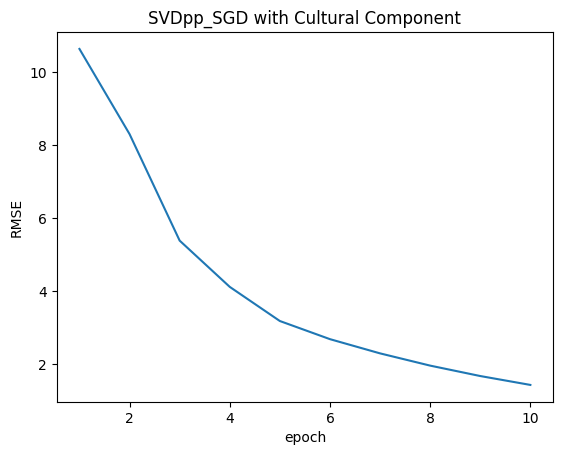

MAE:  [0.95456678] RMSE:  [1.43227462]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class CulturalSVDpp(object):
    def __init__(self, alpha, reg_p, reg_q, reg_bu, reg_bi, reg_cultural, number_LatentFactors=10, number_epochs=10, K=10,
                 columns=["userId", "movieId", "rating", "country"], cultural_dim_weights=[1/6]*6, epsilon2=0.5, epsilon3=0.5, cultural_dimension_variances=[1]*6):
        self.alpha = alpha
        self.reg_p = reg_p
        self.reg_q = reg_q
        self.reg_bu = reg_bu
        self.reg_bi = reg_bi
        self.reg_cultural = reg_cultural
        self.number_LatentFactors = number_LatentFactors
        self.number_epochs = number_epochs
        self.K = K
        self.columns = columns
        self.cultural_dim_weights = cultural_dim_weights
        self.epsilon2 = epsilon2
        self.epsilon3 = epsilon3
        self.cultural_dimension_variances = cultural_dimension_variances

    def fit(self, dataset, valset, cultural_data):
        self.dataset = pd.DataFrame(dataset)
        self.valset = valset
        self.cultural_data = cultural_data

        self.users_ratings = dataset.groupby(self.columns[0]).agg([list])[[self.columns[1], self.columns[2]]]
        self.items_ratings = dataset.groupby(self.columns[1]).agg([list])[[self.columns[0], self.columns[2]]]
        self.globalMean = self.dataset[self.columns[2]].mean()

        self.P, self.Q, self.bu, self.bi, self.Y, self.C = self.sgd()

    def _init_matrix(self):
        P = dict(zip(
            self.users_ratings.index,
            np.random.rand(len(self.users_ratings), self.number_LatentFactors).astype(np.float32)
        ))
        Q = dict(zip(
            self.items_ratings.index,
            np.random.rand(len(self.items_ratings), self.number_LatentFactors).astype(np.float32)
        ))

        countries = self.dataset[self.columns[3]].unique()
        C = dict(zip(
            countries,
            np.random.rand(len(countries), self.number_LatentFactors).astype(np.float32)
        ))
        return P, Q, C

    def cultural_distance(self, country1, country2):
        if country1 not in self.cultural_data or country2 not in self.cultural_data:
            return 0.0

        country1_data = self.cultural_data[country1]
        country2_data = self.cultural_data[country2]

        distance = 0.0
        m = len(country1_data)
        if m != len(country2_data):
            raise ValueError("Cultural dimension vectors must have the same length")

        for i in range(m):
            distance += (self.cultural_dim_weights[i] * self.cultural_dimension_variances[i] * (country1_data[i] - country2_data[i])**2)

        return np.sqrt(distance)

    def cultural_similarity(self, country1, country2):
        cd1 = self.cultural_distance(country1, country1)
        cd2 = self.cultural_distance(country2, country2)
        return 1 - (cd1 + cd2)

    def user_preference(self, user_country, service_country):
        cdu = self.cultural_distance(user_country, user_country)
        cds = self.cultural_distance(service_country, service_country)
        return abs(cdu - cds)

    def select_heuristic_services(self, new_user_country):
        similar_users = []
        for user in self.users_ratings.index:
            user_country = self.dataset[self.dataset[self.columns[0]] == user][self.columns[3]].iloc[0]
            similarity = self.cultural_similarity(new_user_country, user_country)
            similar_users.append((user, similarity))

        similar_users = sorted(similar_users, key=lambda x: x[1], reverse=True)
        similar_users = [user for user, similarity in similar_users]

        preferred_services = set()
        for user in similar_users:
            user_country = self.dataset[self.dataset[self.columns[0]] == user][self.columns[3]].iloc[0]
            user_services = self.dataset[self.dataset[self.columns[0]] == user][self.columns[1]].tolist()
            for service in user_services:
                service_country = self.dataset[self.dataset[self.columns[1]] == service][self.columns[3]].iloc[0]
                preference = self.user_preference(user_country, service_country)
                if preference < self.epsilon2:
                    preferred_services.add(service)

        preferred_services = list(preferred_services)

        if len(preferred_services) < self.K:
            additional_services = set()
            for service in preferred_services:
                service_country = self.dataset[self.dataset[self.columns[1]] == service][self.columns[3]].iloc[0]
                for other_service in self.items_ratings.index:
                    other_service_country = self.dataset[self.dataset[self.columns[1]] == other_service][self.columns[3]].iloc[0]
                    similarity = self.cultural_similarity(service_country, other_service_country)
                    if similarity > self.epsilon3:
                        additional_services.add(other_service)

            preferred_services.extend(list(additional_services))

        return preferred_services[:self.K]

    def predict(self, uid, iid):
        if uid not in self.users_ratings.index or iid not in self.items_ratings.index:
            user_country = self.dataset[self.dataset[self.columns[0]] == uid][self.columns[3]].iloc[0]
            heuristic_services = self.select_heuristic_services(user_country)
            if not heuristic_services:
                return self.globalMean

            qos_predictions = []
            for service in heuristic_services:
                if service in self.items_ratings.index:
                    users_of_service = self.dataset[self.dataset[self.columns[1]] == service][self.columns[0]].tolist()
                    if users_of_service:
                        ratings = [self.dataset[(self.dataset[self.columns[0]] == u) & (self.dataset[self.columns[1]] == service)][self.columns[2]].iloc[0]
                                    for u in users_of_service if u in self.users_ratings.index]
                        if ratings:
                            qos_predictions.append(np.mean(ratings))

            if qos_predictions:
                return np.mean(qos_predictions)
            else:
                return self.globalMean

        p_u = self.P[uid]
        q_i = self.Q[iid]
        Y = self.Y

        _sum_yj = np.zeros([1, self.number_LatentFactors])
        jids = self.users_ratings.loc[uid]['movieId'][0]
        Nu = len(jids)
        for jid in jids:
            _sum_yj += Y[jid]

        user_country = self.dataset[self.dataset[self.columns[0]] == uid][self.columns[3]].iloc[0]
        item_country = self.dataset[self.dataset[self.columns[1]] == iid][self.columns[3]].iloc[0]

        c_u = self.C[user_country]
        c_i = self.C[item_country]
        cultural_component = np.dot(c_u, c_i)

        return self.globalMean + self.bu[uid] + self.bi[iid] + np.dot(p_u + np.sqrt(1 / Nu) * _sum_yj, q_i) + cultural_component

    def test(self, testset):
        for uid, iid, real_rating, country in testset.itertuples(index=False):
            try:
                pred_rating = self.predict(uid, iid)
            except Exception as e:
                print(e)
            else:
                yield uid, iid, real_rating, pred_rating

    def accuracy(self, predict_results):
        def mae_rmse(predict_results):
            length = 0
            _mae_sum = 0
            _rmse_sum = 0
            for uid, iid, real_rating, pred_rating in predict_results:
                length += 1
                _mae_sum += abs(pred_rating - real_rating)
                _rmse_sum += (pred_rating - real_rating) ** 2
            return _mae_sum / length, np.sqrt(_rmse_sum / length)

        mae, rmse = mae_rmse(predict_results)
        return mae, rmse

    def sgd(self):
        P, Q, C = self._init_matrix()

        bu = dict(zip(self.users_ratings.index, np.zeros(len(self.users_ratings))))
        bi = dict(zip(self.items_ratings.index, np.zeros(len(self.items_ratings))))
        Y = dict(zip(
            self.items_ratings.index,
            np.random.rand(len(self.items_ratings), self.number_LatentFactors).astype(np.float32)
        ))

        mae_list = []
        rmse_list = []

        for i in range(self.number_epochs):
            print("iter%d" % i)
            error_list = []
            for uid, iid, r_ui, country in self.dataset.itertuples(index=False):

                jids = self.users_ratings.loc[uid]['movieId'][0]
                Nu = len(jids)
                _sum_yj = np.zeros([self.number_LatentFactors])

                for jid in jids:
                    _sum_yj += Y[jid]

                user_country = self.dataset[self.dataset[self.columns[0]] == uid][self.columns[3]].iloc[0]
                item_country = self.dataset[self.dataset[self.columns[1]] == iid][self.columns[3]].iloc[0]
                c_u = C[user_country]
                c_i = C[item_country]

                pred = self.globalMean + bu[uid] + bi[iid] + np.dot(P[uid] + np.sqrt(1 / Nu) * _sum_yj, Q[iid]) + np.dot(c_u, c_i)
                err = np.float32(r_ui - pred)

                for jid in jids:
                    Y[jid] += self.alpha * (err * np.sqrt(1 / Nu) * Q[iid] - 0.01 * Y[jid])

                P[uid] += self.alpha * (err * Q[iid] - self.reg_p * P[uid])
                Q[iid] += self.alpha * (err * (P[uid] + np.sqrt(1 / Nu) * _sum_yj) - self.reg_q * Q[iid])

                bu[uid] += self.alpha * (err - self.reg_bu * bu[uid])
                bi[iid] += self.alpha * (err - self.reg_bi * bi[iid])

                C[user_country] += self.alpha * (err * c_i - self.reg_cultural * c_u)
                C[item_country] += self.alpha * (err * c_u - self.reg_cultural * c_i)

                error_list.append(err ** 2)
            print(np.sqrt(np.mean(error_list)))
            self.P = P
            self.Q = Q
            self.bu = bu
            self.bi = bi
            self.Y = Y
            self.C = C

            pred_results = self.test(self.valset)
            mae, rmse = self.accuracy(pred_results)
            mae_list.append(mae)
            rmse_list.append(rmse)
            print("MAE: ", mae, "RMSE: ", rmse)

        x = range(1, self.number_epochs + 1)
        plt.plot(x, rmse_list)
        plt.title('SVDpp_SGD with Cultural Component')
        plt.xlabel('epoch')
        plt.ylabel('RMSE')
        plt.show()
        return P, Q, bu, bi, Y, C

if __name__ == '__main__':
    cultural_data = pd.read_excel('/content/Hofstedes Dimensions Data.xlsx')
    trainset = pd.read_csv('/content/cleaned_qos_data.csv')
    trainset = trainset.rename(columns={
        '[User ID]': 'userId',
        '[IP No.]': 'movieId',
        '[Latitude]': 'rating',
        '[Longitude]': 'country'
    })
    alpha = 0.01
    reg_p = 0.01
    reg_q = 0.01
    reg_bu = 0.01
    reg_bi = 0.01
    reg_cultural = 0.01
    number_LatentFactors = 10
    number_epochs = 10
    K = 10
    cultural_dim_weights = [1/6]*6
    columns=["userId", "movieId", "rating", "country"]
    epsilon2 = 0.5
    epsilon3 = 0.5
    cultural_dimension_variances = [1]*6

    algo = CulturalSVDpp(alpha, reg_p, reg_q, reg_bu, reg_bi, reg_cultural, number_LatentFactors, number_epochs, K, columns, cultural_dim_weights, epsilon2, epsilon3, cultural_dimension_variances)
    algo.fit(trainset, valset, cultural_data)

    pred_results = algo.test(valset)
    mae, rmse = algo.accuracy(pred_results)
    print("MAE: ", mae, "RMSE: ", rmse)


In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class CulturalSVDpp(object):
    def __init__(self, alpha, reg_p, reg_q, reg_bu, reg_bi, reg_cultural, number_LatentFactors=10, number_epochs=10, K=10,
                 columns=["userId", "movieId", "rating", "country"], cultural_dim_weights=[1/6]*6, epsilon2=0.5, epsilon3=0.5, cultural_dimension_variances=[1]*6):
        self.alpha = alpha
        self.reg_p = reg_p
        self.reg_q = reg_q
        self.reg_bu = reg_bu
        self.reg_bi = reg_bi
        self.reg_cultural = reg_cultural
        self.number_LatentFactors = number_LatentFactors
        self.number_epochs = number_epochs
        self.K = K
        self.columns = columns
        self.cultural_dim_weights = cultural_dim_weights
        self.epsilon2 = epsilon2
        self.epsilon3 = epsilon3
        self.cultural_dimension_variances = cultural_dimension_variances
        self.cultural_data = None
        self.dataset = None
        self.valset = None
        self.users_ratings = None
        self.items_ratings = None
        self.globalMean = None
        self.P = None
        self.Q = None
        self.bu = None
        self.bi = None
        self.Y = None
        self.C = None

    def fit(self, dataset, valset, cultural_data):
        self.dataset = pd.DataFrame(dataset)
        self.valset = valset
        self.cultural_data = cultural_data

        self.users_ratings = dataset.groupby(self.columns[0]).agg([list])[[self.columns[1], self.columns[2]]]
        self.items_ratings = dataset.groupby(self.columns[1]).agg([list])[[self.columns[0], self.columns[2]]]
        self.globalMean = self.dataset[self.columns[2]].mean()

        self.P, self.Q, self.bu, self.bi, self.Y, self.C = self.sgd()

    def _init_matrix(self):
        P = dict(zip(
            self.users_ratings.index,
            np.random.rand(len(self.users_ratings), self.number_LatentFactors).astype(np.float32)
        ))
        Q = dict(zip(
            self.items_ratings.index,
            np.random.rand(len(self.items_ratings), self.number_LatentFactors).astype(np.float32)
        ))

        countries = self.dataset[self.columns[3]].unique()
        C = dict(zip(
            countries,
            np.random.rand(len(countries), self.number_LatentFactors).astype(np.float32)
        ))
        return P, Q, C

    def cultural_distance(self, country1, country2):
        if isinstance(country1, str) and isinstance(country2, str) and country1 in self.cultural_data.index and country2 in self.cultural_data.index:
            country1_data = self.cultural_data.loc[country1].values
            country2_data = self.cultural_data.loc[country2].values
        else:
            return 0.0

        distance = 0.0
        m = len(country1_data)
        if m != len(country2_data):
            raise ValueError("Cultural dimension vectors must have the same length")

        for i in range(m):
            distance += (self.cultural_dim_weights[i] * self.cultural_dimension_variances[i] * (country1_data[i] - country2_data[i])**2)

        return np.sqrt(distance)

    def cultural_similarity(self, country1, country2):
        cd1 = self.cultural_distance(country1, country1)
        cd2 = self.cultural_distance(country2, country2)
        return 1 - (cd1 + cd2)

    def user_preference(self, user_country, service_country):
        cdu = self.cultural_distance(user_country, user_country)
        cds = self.cultural_distance(service_country, service_country)
        return abs(cdu - cds)

    def select_heuristic_services(self, new_user_country):
        similar_users = []
        for user in self.users_ratings.index:
            user_country_df = self.dataset[self.dataset[self.columns[0]] == user]
            if not user_country_df.empty:
                user_country = user_country_df[self.columns[3]].iloc[0]
                similarity = self.cultural_similarity(new_user_country, user_country)
                similar_users.append((user, similarity))

        similar_users = sorted(similar_users, key=lambda x: x[1], reverse=True)
        similar_users = [user for user, similarity in similar_users]

        preferred_services = set()
        for user in similar_users:
            if not self.users_ratings.index.isin([user]).any():
                continue

            user_country_df = self.dataset[self.dataset[self.columns[0]] == user]
            if not user_country_df.empty:
                user_country = user_country_df[self.columns[3]].iloc[0]
            else:
                continue

            user_services = self.dataset[self.dataset[self.columns[0]] == user][self.columns[1]].tolist()
            for service in user_services:
                if not self.items_ratings.index.isin([service]).any():
                    continue

                service_country_df = self.dataset[self.dataset[self.columns[1]] == service]
                if not service_country_df.empty:
                    service_country = service_country_df[self.columns[3]].iloc[0]
                else:
                    continue

                preference = self.user_preference(user_country, service_country)
                if preference < self.epsilon2:
                    preferred_services.add(service)

        preferred_services = list(preferred_services)

        if len(preferred_services) < self.K:
            additional_services = set()
            for service in preferred_services:
                if not self.items_ratings.index.isin([service]).any():
                    continue

                service_country_df = self.dataset[self.dataset[self.columns[1]] == service]
                if not service_country_df.empty:
                    service_country = service_country_df[self.columns[3]].iloc[0]
                else:
                    continue

                for other_service in self.items_ratings.index:
                    if not self.items_ratings.index.isin([other_service]).any():
                        continue

                    other_service_country_df = self.dataset[self.dataset[self.columns[1]] == other_service]
                    if not other_service_country_df.empty:
                        other_service_country = other_service_country_df[self.columns[3]].iloc[0]
                    else:
                        continue

                    similarity = self.cultural_similarity(service_country, other_service_country)
                    if similarity > self.epsilon3:
                        additional_services.add(other_service)

            preferred_services.extend(list(additional_services))

        return preferred_services[:self.K]

    def predict(self, uid, iid):
        if uid not in self.users_ratings.index or iid not in self.items_ratings.index:
            try:
                user_country_df = self.dataset[self.dataset[self.columns[0]] == uid]
                if not user_country_df.empty:
                    user_country = user_country_df[self.columns[3]].iloc[0]
                else:
                    print(f"User {uid} not found in dataset")
                    return self.globalMean
            except:
                print(f"User {uid} not found in dataset")
                return self.globalMean
            heuristic_services = self.select_heuristic_services(user_country)
            if not heuristic_services:
                return self.globalMean

            qos_predictions = []
            for service in heuristic_services:
                if service in self.items_ratings.index:
                    users_of_service = self.dataset[self.dataset[self.columns[1]] == service][self.columns[0]].tolist()
                    if users_of_service:
                        ratings = [self.dataset[(self.dataset[self.columns[0]] == u) & (self.dataset[self.columns[1]] == service)][self.columns[2]].iloc[0]
                                    for u in users_of_service if u in self.users_ratings.index and (self.dataset[(self.dataset[self.columns[0]] == u) & (self.dataset[self.columns[1]] == service)][self.columns[2]].shape[0] > 0)]
                        if ratings:
                            qos_predictions.append(np.mean(ratings))

            if qos_predictions:
                return np.mean(qos_predictions)
            else:
                return self.globalMean

        p_u = self.P[uid]
        q_i = self.Q[iid]
        Y = self.Y

        _sum_yj = np.zeros([1, self.number_LatentFactors])
        jids = self.users_ratings.loc[uid]['movieId'][0]
        Nu = len(jids)
        for jid in jids:
            _sum_yj += Y[jid]

        user_country_df = self.dataset[self.dataset[self.columns[0]] == uid]
        if not user_country_df.empty:
            user_country = user_country_df[self.columns[3]].iloc[0]
        else:
            user_country = None

        item_country_df = self.dataset[self.dataset[self.columns[1]] == iid]
        if not item_country_df.empty:
            item_country = item_country_df[self.columns[3]].iloc[0]
        else:
            item_country = None

        if user_country is not None and item_country is not None:
            c_u = self.C[user_country]
            c_i = self.C[item_country]
            cultural_component = np.dot(c_u, c_i)
        else:
            cultural_component = 0.0

        return self.globalMean + self.bu[uid] + self.bi[iid] + np.dot(p_u + np.sqrt(1 / Nu) * _sum_yj, q_i) + cultural_component

    def test(self, testset):
        for uid, iid, real_rating, country in testset.itertuples(index=False):
            try:
                pred_rating = self.predict(uid, iid)
            except Exception as e:
                print(e)
            else:
                yield uid, iid, real_rating, pred_rating

    def accuracy(self, predict_results):
        def mae_rmse(predict_results):
            length = 0
            _mae_sum = 0
            _rmse_sum = 0
            for uid, iid, real_rating, pred_rating in predict_results:
                length += 1
                _mae_sum += abs(pred_rating - real_rating)
                _rmse_sum += (pred_rating - real_rating) ** 2
            return _mae_sum / length, np.sqrt(_rmse_sum / length)

        mae, rmse = mae_rmse(predict_results)
        return mae, rmse

    def sgd(self):
        P, Q, C = self._init_matrix()

        bu = dict(zip(self.users_ratings.index, np.zeros(len(self.users_ratings))))
        bi = dict(zip(self.items_ratings.index, np.zeros(len(self.items_ratings))))
        Y = dict(zip(
            self.items_ratings.index,
            np.random.rand(len(self.items_ratings), self.number_LatentFactors).astype(np.float32)
        ))

        mae_list = []
        rmse_list = []

        for i in range(self.number_epochs):
            print("iter%d" % i)
            error_list = []
            for uid, iid, r_ui, country in self.dataset.itertuples(index=False):

                jids = self.users_ratings.loc[uid]['movieId'][0]
                Nu = len(jids)
                _sum_yj = np.zeros([self.number_LatentFactors])

                for jid in jids:
                    Y[jid] += self.alpha * (err * np.sqrt(1 / Nu) * Q[iid] - 0.01 * Y[jid])
                    _sum_yj += Y[jid]

                user_country_df = self.dataset[self.dataset[self.columns[0]] == uid]
                if not user_country_df.empty:
                    user_country = user_country_df[self.columns[3]].iloc[0]
                else:
                    user_country = None

                item_country_df = self.dataset[self.dataset[self.columns[1]] == iid]
                if not item_country_df.empty:
                    item_country = item_country_df[self.columns[3]].iloc[0]
                else:
                    item_country = None

                if user_country is not None and item_country is not None:
                    c_u = C[user_country]
                    c_i = C[item_country]
                    cultural_component = np.dot(c_u, c_i)
                else:
                    cultural_component = 0.0

                pred = self.globalMean + bu[uid] + bi[iid] + np.dot(P[uid] + np.sqrt(1 / Nu) * _sum_yj, Q[iid]) + cultural_component
                err = np.float32(r_ui - pred)

                P[uid] += self.alpha * (err * Q[iid] - self.reg_p * P[uid])
                Q[iid] += self.alpha * (err * (P[uid] + np.sqrt(1 / Nu) * _sum_yj) - self.reg_q * Q[iid])

                bu[uid] += self.alpha * (err - self.reg_bu * bu[uid])
                bi[iid] += self.alpha * (err - self.reg_bi * bi[iid])

                if user_country is not None and item_country is not None:
                    C[user_country] += self.alpha * (err * c_i - self.reg_cultural * c_u)
                    C[item_country] += self.alpha * (err * c_u - self.reg_cultural * c_i)

                error_list.append(err ** 2)
            print(np.sqrt(np.mean(error_list)))
            self.P = P
            self.Q = Q
            self.bu = bu
            self.bi = bi
            self.Y = Y
            self.C = C

            pred_results = self.test(self.valset)
            mae, rmse = self.accuracy(pred_results)
            mae_list.append(mae)
            rmse_list.append(rmse)
            print("MAE: ", mae, "RMSE: ", rmse)

        x = range(1, self.number_epochs + 1)
        plt.plot(x, rmse_list)
        plt.title('SVDpp_SGD with Cultural Component')
        plt.xlabel('epoch')
        plt.ylabel('RMSE')
        plt.show()
        return P, Q, bu, bi, Y, C

if __name__ == '__main__':
    cultural_data = pd.read_excel('/content/Hofstedes Dimensions Data.xlsx', index_col=0)
    trainset = pd.read_csv('/content/cleaned_qos_data.csv')

    #Take subset of data
    n_users = 10
    n_movies = 10
    trainset = trainset[trainset['userId'] <= n_users]
    trainset = trainset[trainset['movieId'] <= (100 + n_movies)]

    # Ensure 'valset' is defined
    valset = train_test_split(trainset, test_size=0.2, random_state=42)[1]

    alpha = 0.01
    reg_p = 0.01
    reg_q = 0.01
    reg_bu = 0.01
    reg_bi = 0.01
    reg_cultural = 0.01
    number_LatentFactors = 10
    number_epochs = 10
    K = 10
    cultural_dim_weights = [1/6]*6
    columns=["userId", "movieId", "rating", "country"]
    epsilon2 = 0.5
    epsilon3 = 0.5
    cultural_dimension_variances = [1]*6

    trainset = trainset.rename(columns={
        '[User ID]': 'userId',
        '[IP No.]': 'movieId',
        '[Latitude]': 'rating',
        '[Longitude]': 'country'
    })

    algo = CulturalSVDpp(alpha, reg_p, reg_q, reg_bu, reg_bi, reg_cultural, number_LatentFactors, number_epochs, K, columns, cultural_dim_weights, epsilon2, epsilon3, cultural_dimension_variances)
    algo.fit(trainset, valset, cultural_data)

    pred_results = algo.test(valset)
    mae, rmse = algo.accuracy(pred_results)
    print("MAE: ", mae, "RMSE: ", rmse)


KeyError: 'userId'